<a href="https://colab.research.google.com/github/dolluyashaswini/resnet/blob/master/resnet_2_5178.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchsummary
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from tqdm.notebook import tqdm
import warnings 
warnings.filterwarnings('ignore')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device



device(type='cuda')

In [0]:
train_transform = transforms.Compose([
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
                                     transforms.Resize(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])
])
                                      

In [0]:
train_data = datasets.CIFAR100(train=True,
                               download=True,
                               root='./data',
                               transform=train_transform)
test_data = datasets.CIFAR100(train=False,
                              download=True,
                              root='./data',
                              transform=test_transform)

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
classes = train_data.classes
print(len(classes))
print(classes)

100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tr

In [0]:
print('Train dataset size:', len(train_data))
print('Test dataset size:', len(test_data))

Train dataset size: 50000
Test dataset size: 10000


In [0]:
train_loader = DataLoader(train_data,
                          batch_size=4,
                          shuffle=True)
test_loader = DataLoader(test_data,
                         batch_size=4,
                         shuffle=False)

In [0]:
def show_imgs(imgs, title):
  imgs = imgs.cpu()
  mean = torch.tensor([0.485, 0.456, 0.406]).view(1,3,1,1)
  std = torch.tensor([0.229, 0.224, 0.225]).view(1,3,1,1)
  imgs = imgs * std + mean
  img_grid = torchvision.utils.make_grid(imgs, nrow=4)
  img_np = img_grid.numpy()
  img_np = np.transpose(img_np, (1,2,0))
  plt.figure(figsize=(8,4))
  plt.imshow(img_np)
  plt.title(title)
  plt.show()

Training Examples:


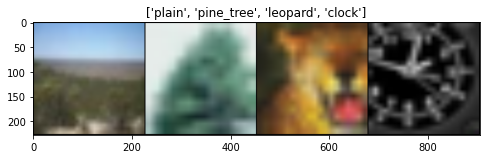

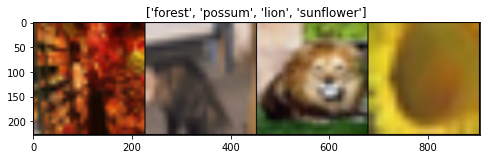

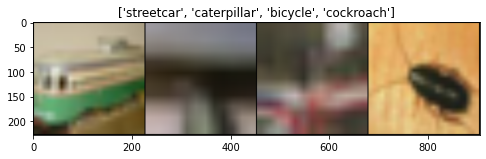

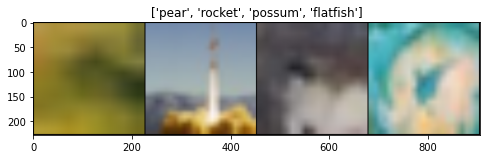

In [0]:
print('Training Examples:')
for i, batch in enumerate(train_loader) :
    if i == 4:
        break
    images, labels = batch
    show_imgs(images, str([classes[i] for i in labels]))

Test Examples:


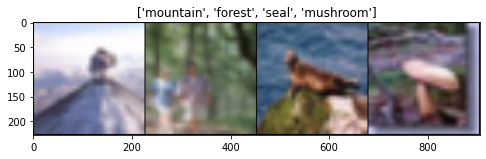

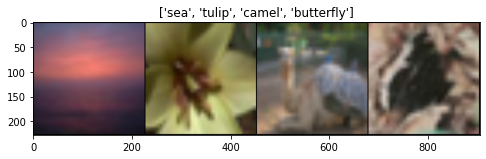

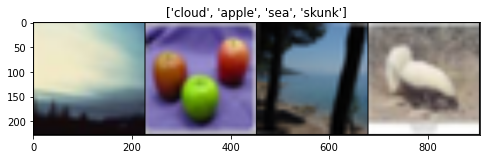

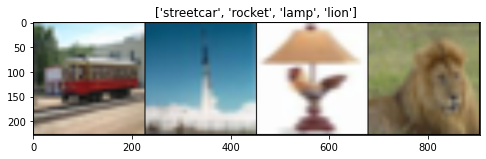

In [0]:
print('Test Examples:')
for i, batch in enumerate (test_loader):
    if i == 4:
        break
    images, labels = batch
    show_imgs(images, str([classes[i] for i in labels]))

**Pretrained Model**

In [0]:
resnet = torchvision.models.resnet18(pretrained=True)
resnet                               

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
torchsummary.summary(resnet.to(device), input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [0]:
resnet.fc

Linear(in_features=512, out_features=1000, bias=True)

**Modifying the fc output layer**

In [0]:
in_features = resnet.fc.in_features
modified_fc = list(resnet.fc.children())[:-1]
modified_fc.append(nn.Linear(in_features, 100))
modified_fc

[Linear(in_features=512, out_features=100, bias=True)]

In [0]:
resnet.fc = nn.Sequential(*modified_fc)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Freezing the layers.**

In [0]:
for param in resnet.parameters(): 
    param.requires_grad = False

In [0]:
for param in resnet.fc[0].parameters():
    param.requires_grad = True

In [0]:
for param in resnet.parameters():
    if param.requires_grad == True:
        print(param.size())

torch.Size([100, 512])
torch.Size([100])


**Training**

In [0]:
def evaluate(model, dataloader):
    total, correct = 0, 0
    model.eval()
    for batch in dataloader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        outs = model(images)
        out_labels = torch.argmax(outs, axis=1)
        total += labels.size(0)
        correct += (labels == out_labels).sum().item()
    return 100 * correct/total    

In [0]:
import copy
def train(model, modelname, loss_fn, optimizer, train_loader, test_loader, epochs):

  hist = {'epoch_loss': [],
            'train_acc': [],
            'test_acc': []}
  min_loss = 10000
  for epoch in tqdm(range(1, epochs+1), total=epochs, desc='Training last layer'):
    losses = []
    for batch in train_loader:
      images, labels = batch
      images, labels = images.to(device), labels.to(device)
      model.train()
      outs = model(images)
      loss = loss_fn(outs, labels)
      losses.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      del images, labels, outs
      torch.cuda.empty_cache()#end of the epoch#
    curr_epoch_loss = np.array(losses).mean()
    hist['epoch_loss'].append(curr_epoch_loss)
    hist['train_acc'].append(evaluate(model, train_loader))
    hist['test_acc'].append(evaluate(model, test_loader))
    if curr_epoch_loss < min_loss:
     min_loss = curr_epoch_loss
     best_model = copy.deepcopy(model.state_dict())

  fig, ax = plt.subplots(ncols=2, figsize=(12,6))
  ax[0].plot(range(1,epochs+1), hist['epoch_loss'], label='Loss')
  ax[0].plot(range(1,epochs+1), np.ones(epochs)*min_loss, 'r--', alpha=0.2, label='Min Loss={}'.format(min_loss))
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Epochs vs. Loss')
  ax[0].grid()
  ax[0].legend()
  ax[1].plot(range(1,epochs+1), hist['train_acc'], 'b--', alpha=0.5, label='Train Accuracy')
  ax[1].plot(range(1,epochs+1), hist['test_acc'], 'r--', alpha=0.5, label='Test Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy Score')
  ax[1].set_title('Epochs vs. Accuracy Score')
  ax[1].grid()
  ax[1].legend()
  plt.plot()
  torch.save(best_model, '{0}_{1:.4f}.pth'.format(modelname, min_loss))
  print("Best loss value: {}".format(min_loss))
  return best_model

In [0]:
train_loader = DataLoader(train_data, 
                          batch_size=16, 
                          shuffle=True)
test_loader = DataLoader(test_data, 
                         batch_size=16, 
                         shuffle=False)


Best loss value: 2.5916134437942504


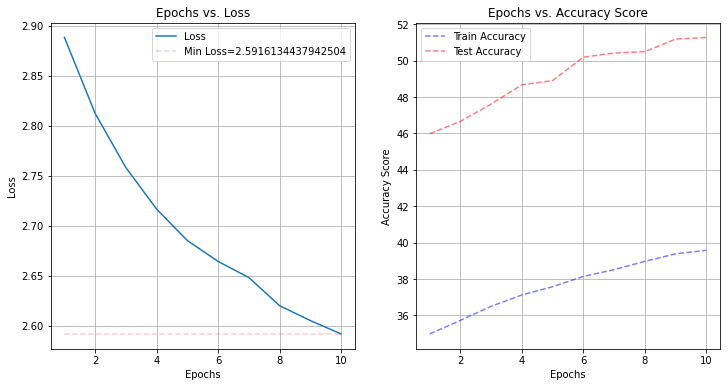

In [0]:
resnet = resnet.to(device)
opt = torch.optim.Adam(resnet.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()
resnet_wts = train(resnet, 'resnet',
                   loss_fn, opt,
                   train_loader,
                   test_loader, 10)


Best loss value: 2.5178973946380614


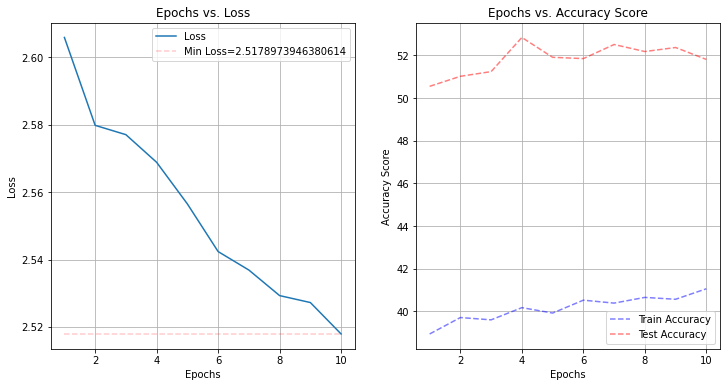

In [0]:
resnet = resnet.to(device)
opt = torch.optim.Adam(resnet.parameters(), lr=0.0002)
loss_fn = nn.CrossEntropyLoss()
resnet_wts = train(resnet, 'resnet',
                   loss_fn, opt,
                   train_loader,
                   test_loader, 10) 


Best loss value: 2.4585839484024046


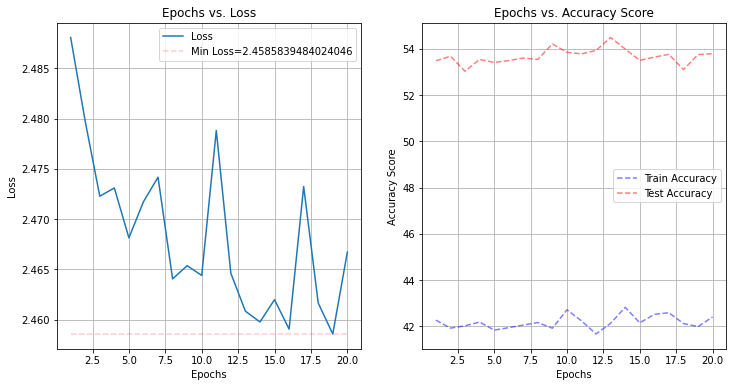

In [0]:
resnet = resnet.to(device)
opt = torch.optim.Adam(resnet.parameters(), lr=0.0002)
loss_fn = nn.CrossEntropyLoss()
resnet_wts = train(resnet, 'resnet',
                   loss_fn, opt,
                   train_loader,
                   test_loader, 20) 